In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML

# Exercise 3

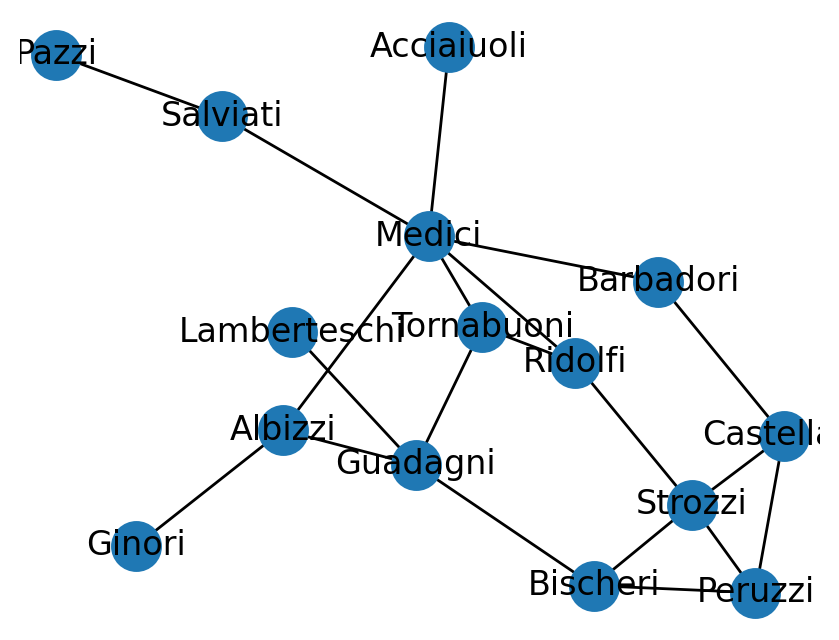

In [ ]:
G = nx.generators.social.florentine_families_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(4,3), dpi = 200)
nx.draw(G, pos, with_labels=True)

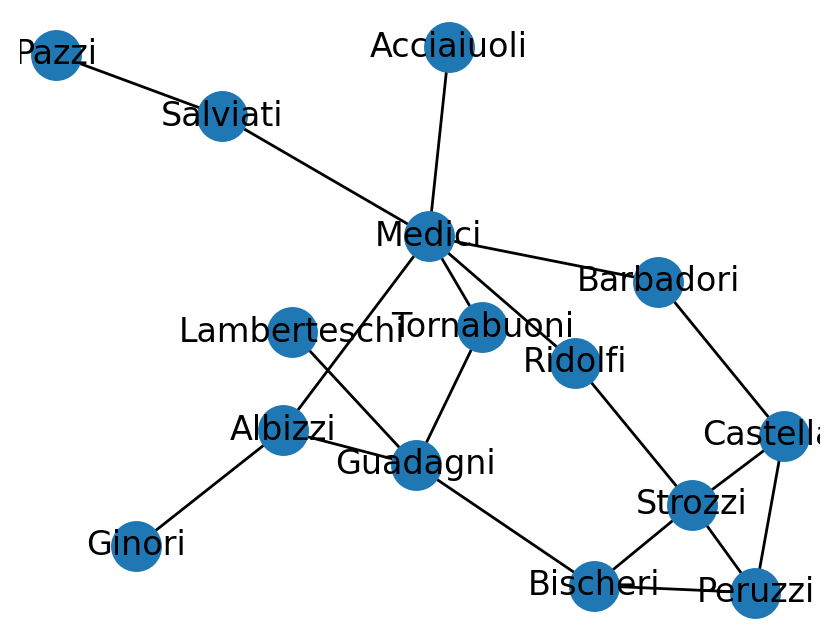

In [ ]:
# the graph reported in our exercise do not have an edge between Ridolfi and Tornabuoni, let's remove it
G.remove_edge('Ridolfi', 'Tornabuoni')
plt.figure(figsize=(4,3), dpi = 200)
nx.draw(G, pos, with_labels=True)

b. Write down a Python code to simulate the averaging dynamics with stubborn nodeset $S$={Medici,Strozzi} and opinions $u_{Medici}$= 1 and $u_{Strozzi}$=−1. Plot the trajectories of the different states and deduce the equilibrium state vector

In [ ]:
n = len(G)
indices = dict()
for i in range(n):
    indices[list(G.nodes)[i]] = i
print("Dictionary (name, index): ", indices)

iters = 50
stubborn_nodes = ['Medici', 'Strozzi']
stubborn_id = [indices.get(key) for key in stubborn_nodes]
regular = [node for node in G.nodes if node not in stubborn_nodes]
regular_id = [id for id in range(n) if id not in stubborn_id]

#initial opinions
u = [1, -1]


W = nx.adjacency_matrix(G) 
W = W.toarray() 
w = np.sum(W,axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ W

Q = P[np.ix_(regular_id, regular_id)]
E = P[np.ix_(regular_id, stubborn_id)]

ic = np.random.uniform(0,1,len(regular))

x = np.zeros((n,iters))
x[stubborn_id,0] = u;
x[regular_id,0] = ic;
print("Initial condition:", x[:,0])

for t in range(1,iters):
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
    x[stubborn_id, t] = x[stubborn_id, t-1];

x_final = x[:,iters-1]

Dictionary (name, index):  {'Acciaiuoli': 0, 'Medici': 1, 'Castellani': 2, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 5, 'Ridolfi': 6, 'Tornabuoni': 7, 'Albizzi': 8, 'Salviati': 9, 'Pazzi': 10, 'Bischeri': 11, 'Guadagni': 12, 'Ginori': 13, 'Lamberteschi': 14}
Initial condition: [ 0.87223244  1.          0.49179762  0.59653522 -1.          0.71759565
  0.02066915  0.81551509  0.49797775  0.87397153  0.10735041  0.18263217
  0.03880702  0.49492624  0.19995445]


In [ ]:
results = pd.DataFrame(list(zip(G.nodes, x_final )), columns =['Node', 'Equilibrium vector'])
results 

,Node,Equilibrium vector
0,Acciaiuoli,1.000000
1,Medici,1.000000
2,Castellani,-0.454545
3,Peruzzi,-0.636362
4,Strozzi,-1.000000
5,Barbadori,0.272728
6,Ridolfi,0.000000
7,Tornabuoni,0.636364
8,Albizzi,0.636364
9,Salviati,1.000000


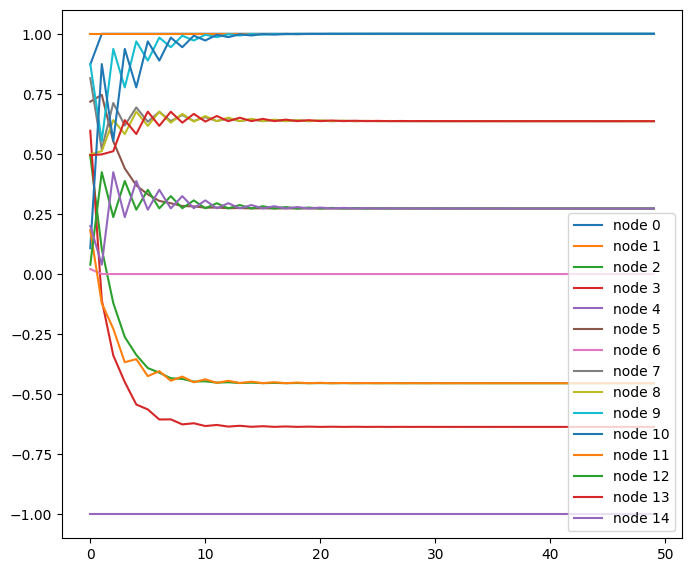

In [ ]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = plt.subplot(111)

for node in range(n):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()

d. Write down a Python code for the iterative distributed computation of the PageRankcentrality in the network with β= 0.15 and uniform input.

In [ ]:
def iterative_page_rank(tol, max_iter):
  beta = 0.15
  mu = np.ones(n)

  # Bonanich centrality 
  # the pagerank centrality is a special case of the Bonacich centrailty with beta = 0.15 and mu = 1
  # initial condition: 1/n-uniform vector of size n_nodes
  x_0 = np.ones(n)/n
  x_old = x_0
  for i in range(max_iter):
      x_new = (1 - beta)* P.T @ x_old + beta*mu
      if np.linalg.norm(x_new-x_old) < tol:
          break
      x_old=x_new
  print("Iterative method \n tol={} and max_iter={}".format(tol, max_iter))
  return x_new

Iterative method 
 tol=1e-06 and max_iter=100


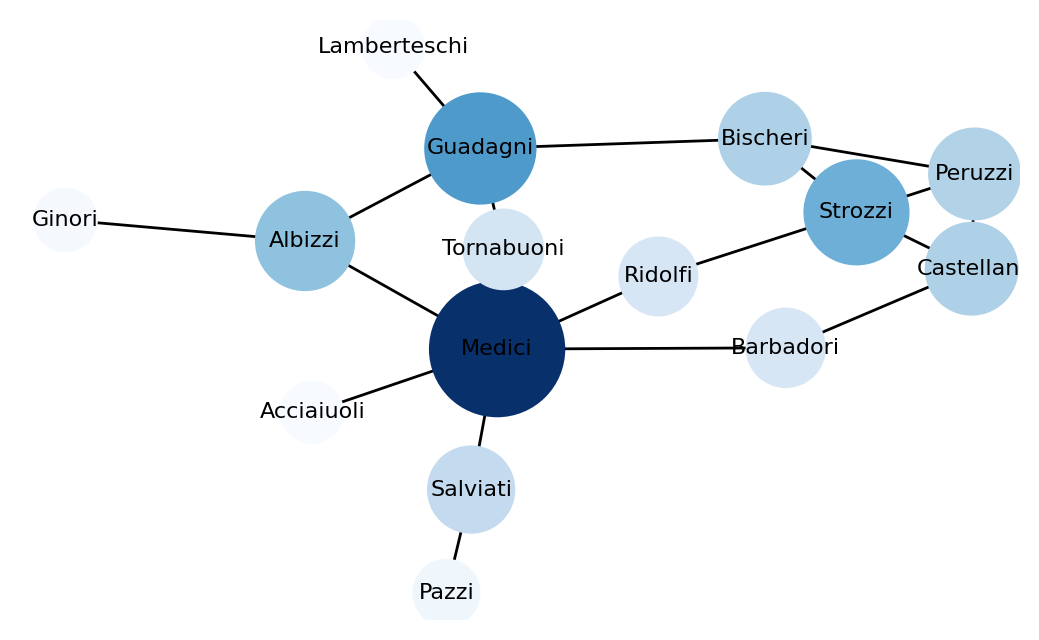

In [ ]:
tol = 1e-6
max_iter = 100
x = iterative_page_rank(tol, max_iter)
x_res = x/np.sum(x)
# alpha = 1-beta
pr = nx.algorithms.link_analysis.pagerank_alg.pagerank(G, alpha=0.85, tol=tol)
plt.figure(figsize=(5,3), dpi = 200)
nx.draw(G,pos,
         with_labels=True,
         nodelist=G.nodes(), 
         node_size = [d*1000 for d in x], 
         node_color=x,
         font_size=8,
         cmap=plt.cm.Blues) 

In [ ]:
results = pd.DataFrame(list(zip(G.nodes, x_res, list(pr.values()) )), columns =['Node', 'Iterative Page Rank', ' NX Page Rank'])
results 

,Node,Iterative Page Rank,NX Page Rank
0,Acciaiuoli,0.031824,0.031824
1,Medici,0.154051,0.154050
2,Castellani,0.071658,0.071658
3,Peruzzi,0.070187,0.070187
4,Strozzi,0.092318,0.092318
5,Barbadori,0.052127,0.052127
6,Ridolfi,0.051442,0.051442
7,Tornabuoni,0.053848,0.053848
8,Albizzi,0.082126,0.082127
9,Salviati,0.063129,0.063130


# Exercise 4

Consider the two simple graphs below where the red node is to be interpreted as astubborn node 0 with opinion $x_0$ = 0. \
Find the positionsfor a second stubborn node with opinion $x_s$= 1 in such a way that, given $x$ the asymptotic opinion profile relative to the averaging dynamics model, the quantity $H(s) = \frac{1}{n} \sum_{i\in V} x_i$  is maximed.

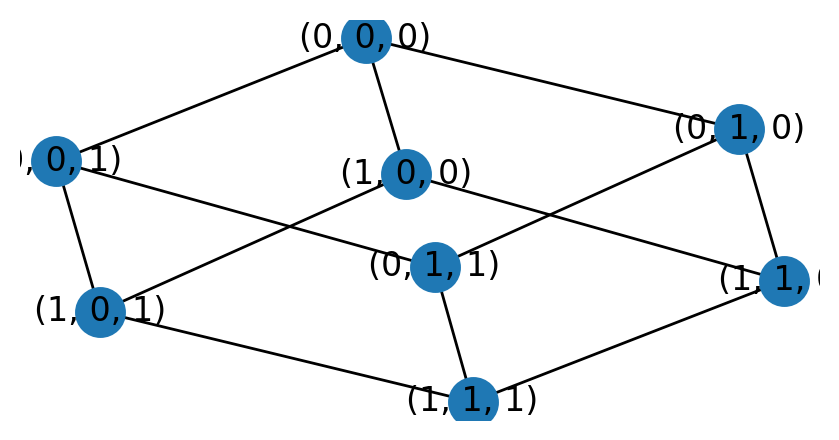

In [2]:
G = nx.hypercube_graph(3)
pos = nx.spring_layout(G)
plt.figure(figsize=(4,2), dpi = 200)
nx.draw(G, pos, with_labels=True)

In [ ]:
n = len(G)
max = 0
indices = dict()
for i in range(n):
    indices[list(G.nodes)[i]] = i
print("Dictionary (name, index): ", indices)

final_opinions = dict()
average_opinion = dict() 

iters = 50
for (i,j,z) in G.nodes:
    if (i,j,z)==(0,0,0):
        continue
        
    # Stubborn and regular nodes
    stubborn = [(0,0,0), (i,j,z)];
    stubborn_id = [indices.get(key) for key in stubborn]
    regular = [node for node in G.nodes if node not in stubborn]
    regular_id = [id for id in range(n) if id not in stubborn_id]
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]

    W = nx.adjacency_matrix(G) 
    W = W.toarray() 
    w = np.sum(W,axis=1)
    D = np.diag(w)
    P = np.linalg.inv(D) @ W

    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    ic = np.random.uniform(0,1,len(regular))

    x = np.zeros((n,iters))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;
    #print("Initial condition:", x[:,0])

    for t in range(1,iters):
      #x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1] #
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[(i,j,z)] = x[:,iters-1]
    average_opinion[(i,j,z)] = np.average(final_opinions[(i,j,z)])
    print("Average opinion:", average_opinion[(i,j,z)])
    if average_opinion[(i,j,z)] > max:
      max = average_opinion[(i,j,z)]
      max_node = (i,j,z)

Dictionary (name, index):  {(0, 0, 0): 0, (0, 0, 1): 1, (0, 1, 0): 2, (0, 1, 1): 3, (1, 0, 0): 4, (1, 0, 1): 5, (1, 1, 0): 6, (1, 1, 1): 7}
Stubborn nodes: [(0, 0, 0), (0, 0, 1)]
Average opinion: 0.5000024665301639
Stubborn nodes: [(0, 0, 0), (0, 1, 0)]
Average opinion: 0.5000013883278114
Stubborn nodes: [(0, 0, 0), (0, 1, 1)]
Average opinion: 0.5000000447446438
Stubborn nodes: [(0, 0, 0), (1, 0, 0)]
Average opinion: 0.5000001256074658
Stubborn nodes: [(0, 0, 0), (1, 0, 1)]
Average opinion: 0.4999999865571795
Stubborn nodes: [(0, 0, 0), (1, 1, 0)]
Average opinion: 0.5000000160658173
Stubborn nodes: [(0, 0, 0), (1, 1, 1)]
Average opinion: 0.49999999996371747


In [ ]:
results = pd.DataFrame(list(zip(average_opinion.keys(),  list(average_opinion.values()) )), columns =['Stubborn Node', 'H(s)'])
results

,Stubborn Node,H(s)
0,"(0, 0, 1)",0.500002
1,"(0, 1, 0)",0.500001
2,"(0, 1, 1)",0.500000
3,"(1, 0, 0)",0.500000
4,"(1, 0, 1)",0.500000
5,"(1, 1, 0)",0.500000
6,"(1, 1, 1)",0.500000


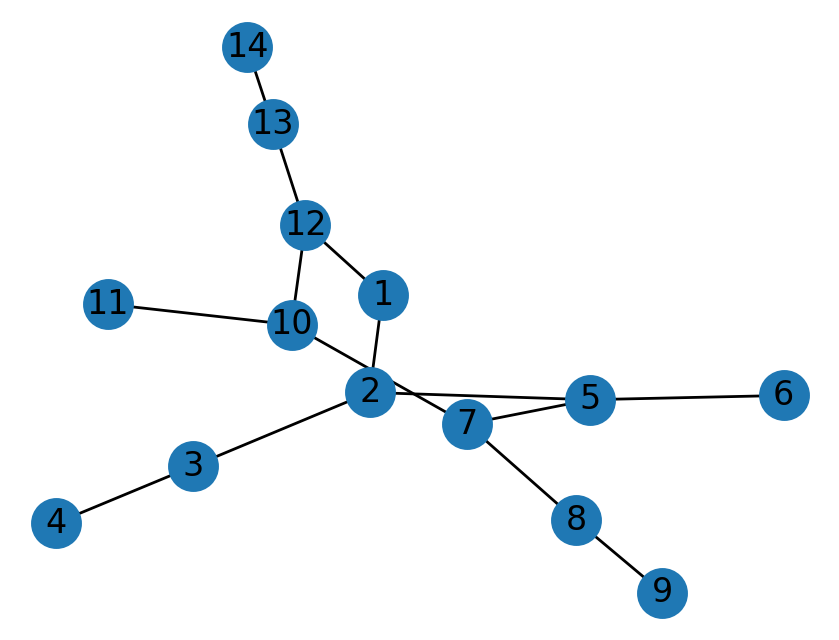

In [3]:
G = nx.Graph()
G.add_nodes_from(range(1,14))
G.add_edges_from([(1,2), (2,3), (3,4), (2,5), (5,6), (5,7), (7,8), 
                  (8,9), (7,10), (10,11), (10,12), (12,13), (13,14), (12,1)])
pos = nx.spring_layout(G)
plt.figure(figsize=(4,3), dpi = 200)
nx.draw(G,pos, with_labels=True)

In [6]:
n = len(G)
max = 0
max_node = 0
indices = dict()
for i in range(n):
    indices[list(G.nodes)[i]] = i
print("Dictionary (name, index): ", indices)

final_opinions = dict()
average_opinion = dict() 

iters = 50
for i in G.nodes:
    if i == 1:
        continue
        
    # Stubborn and regular nodes
    stubborn = [1, i];
    stubborn_id = [indices.get(key) for key in stubborn]
    regular = [node for node in G.nodes if node not in stubborn]
    regular_id = [id for id in range(n) if id not in stubborn_id]
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]

    W = nx.adjacency_matrix(G) 
    W = W.toarray() 
    w = np.sum(W,axis=1)
    D = np.diag(w)
    P = np.linalg.inv(D) @ W

    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    ic = np.random.uniform(0,1,len(regular))

    x = np.zeros((n,iters))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;
    #print("Initial condition:", x[:,0])

    for t in range(1,iters):
      #x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1] #
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[i] = x[:,iters-1]
    average_opinion[i] = np.average(final_opinions[i])
    print("Average opinion:", average_opinion[i])
    print(max_node)
    if average_opinion[i] > max:
      max = average_opinion[i]
      max_node = i

print("Best node is {} with H(s) equals to {} ".format(max_node, max))

Dictionary (name, index):  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13}
Stubborn nodes: [1, 2]
Average opinion: 0.5576293419278465
0
Stubborn nodes: [1, 3]
Average opinion: 0.34278801743848086
2
Stubborn nodes: [1, 4]
Average opinion: 0.2578329118432075
2
Stubborn nodes: [1, 5]
Average opinion: 0.5356586866198881
2
Stubborn nodes: [1, 6]
Average opinion: 0.33851974639266785
2
Stubborn nodes: [1, 7]
Average opinion: 0.5476318393988219
2
Stubborn nodes: [1, 8]
Average opinion: 0.3859812513945512
2
Stubborn nodes: [1, 9]
Average opinion: 0.2982579467065161
2
Stubborn nodes: [1, 10]
Average opinion: 0.5362336223945422
2
Stubborn nodes: [1, 11]
Average opinion: 0.3409498610183594
2
Stubborn nodes: [1, 12]
Average opinion: 0.5596933391274029
2
Stubborn nodes: [1, 13]
Average opinion: 0.33951195549475877
12
Stubborn nodes: [1, 14]
Average opinion: 0.25039017934960084
12
Best node is 12 with H(s) equals to 0.5596933391274029 


In [ ]:
results = pd.DataFrame(list(zip(average_opinion.keys(),  list(average_opinion.values()) )), columns =['Stubborn Node', 'H(s)'])
results

,Stubborn Node,H(s)
0,2,0.555539
1,3,0.331714
2,4,0.261775
3,5,0.535765
4,6,0.341601
5,7,0.547629
6,8,0.386400
7,9,0.298307
8,10,0.535193
9,11,0.338967
